# Question 1

In [3]:
import numpy as np
import scipy.linalg as la
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [53]:
def solvesystem_qr(A, b):
    """
    Given mxn matrix A and mx1 vector b. Solve for Ax = b.
    Use QR decomposition to solve for OLS solution
    """
    m,n = A.shape
    
    if np.linalg.matrix_rank(A) != n:
        raise ValueError('A must be full rank')
    if len(b) != m:
        raise ValueError('A must be mxn matrix. b must be nx1 vector')
        
    Q,R = la.qr(A, mode='economic')
    x = la.solve_triangular(R, Q.T @ b)
    return x

# Question 2

Text(0,0.5,'Price')

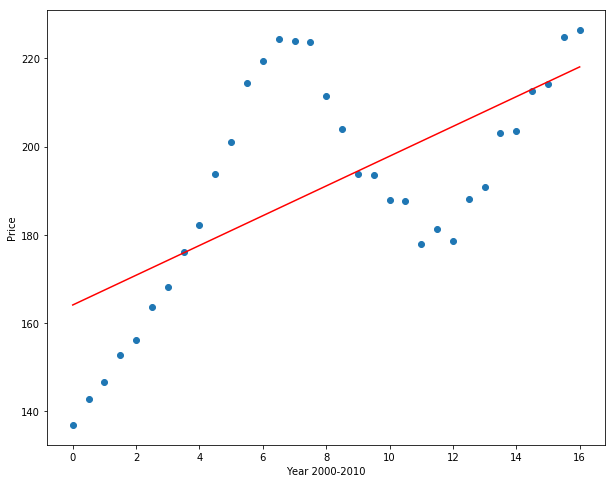

In [54]:
housing = np.load('housing.npy')
year = housing[:,0]
price = housing[:,1]

b = np.copy(price)
A = np.column_stack((year, np.ones(len(year))))

beta = solvesystem_qr(A,b)

fig, ax = plt.subplots(figsize=(10,8))
plt.scatter(year,price)
plt.plot(year, beta[0]*year + beta[1], 'r')
plt.xlabel('Year 2000-2010')
plt.ylabel('Price')

# Question 3

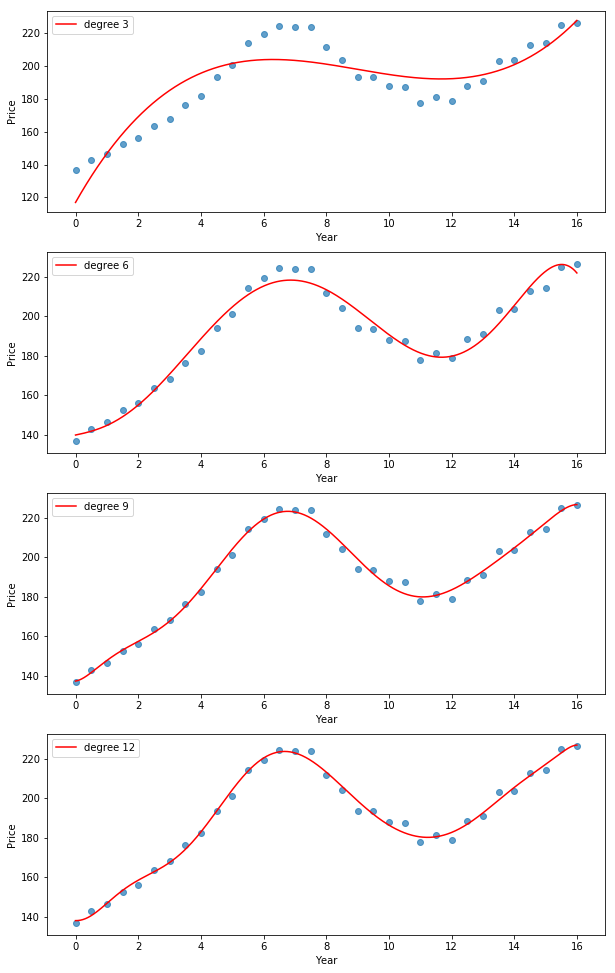

In [137]:
year = housing[:,0]
price = housing[:,1]


def vander_regress(A=year, b=price, col_num=2):
    
    vander = np.vander(A, col_num)
    beta = la.lstsq(vander, b)[0]
    return beta, vander


fig, axes = plt.subplots(4,1, figsize=(10,17))
grid = np.linspace(0,16,1000)
choose_numpy = False

for i, degree in enumerate([3, 6, 9, 12]):
    if choose_numpy:
        coeff = np.polyfit(x=year, y=price, deg=degree)
        beta = coeff
    else:
        # alex
        beta, vander = vander_regress(A=year, b=price, col_num=degree+1)#, col_num=degree+1)
    
    yhat = np.vander(grid,degree+1) @ beta

    axes[i].plot(grid, yhat, 'r', label='degree {}'.format(degree))
    axes[i].scatter(year, price, alpha=0.7)
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('Price')
    axes[i].legend()

# Question 4

In [176]:
ellipse = np.load('ellipse.npy')

def plot_ellipse(a,b,c,d,e):
    """
    Plot an ellipse of form:
    ax^2 + bx + cxy + dy + ey^2 = 1
    """
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    A = a*(cos_t**2) + c*cos_t*sin_t + e*(sin_t**2)
    B = b*cos_t + d*sin_t
    r = (-B + np.sqrt(B**2 + 4**A)) / (2*A)
    plt.plot(r*cos_t, r*sin_t, lw=2, c='r')
    plt.gca().set_aspect('equal', 'datalim')
    
def estimate_ellipse(x,y):
    
    A = np.column_stack((x**2, x, x*y, y, y**2))
    b = np.ones(len(x))
    beta = la.lstsq(A, b)[0]
    
    return beta

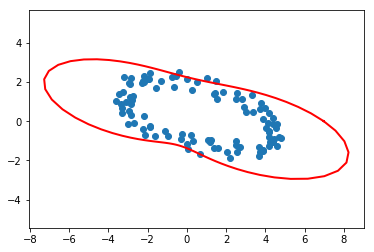

In [179]:
beta = estimate_ellipse(ellipse[:,0], ellipse[:,1])

plot_ellipse(*beta)
plt.scatter(ellipse[:,0], ellipse[:,1])


# Question 5

In [233]:
def power(A, maxiter=100, tol=1e-7):
    """use power method to find biggest eigenvalue """
    m,n = A.shape
    xinitial = np.random.random(n)
    xinital = xinitial / la.norm(xinitial)
    
    its=0
    diff = 7.0
    xlast = xinitial
    while diff > tol and its < maxiter:
        # update
        xnew = A @ xlast
        xnew = xnew / la.norm(xnew)
        
        # check for convergence, 
        diff = (xnew - xlast).max()
        its += 1
        xlast = xnew
        
    if its < maxiter:
        print('Convegered after {} iterations'.format(its))
    x = xnew  # our solution
    return (x.T @ A @ x, x)

In [250]:
A = np.random.random((10,10))
dom_lamb, dom_x = power(A)
#test
print(np.allclose(dom_lamb * dom_x, A @ dom_x))
# dominant
eigs, vecs = la.eig(A)
loc = np.argmax(eigs)
lamb, x = eigs[loc], vecs[:,loc]

lamb <= dom_lamb

Convegered after 11 iterations
True


True

# Question 6

In [6]:
def qr_algorithm(A, N=1000, tol=1e-8):
    
    m, n = A.shape
    S = la.hessenberg(A)
    
    for k in range(N-1):
        Q, R = la.qr(S)
        S = R @ Q
                        
    eigs = []
    i = 0
        
    while i < n:        
        if (S[i, i] == np.diag(S)[-1]):
            eigs.append(S[i, i])
        elif S[i+1, i] < tol:
            eigs.append(S[i, i])
        else:
            a, b, c, d = S[i:i+2, i:i+2].flatten()  # Get elements of block matrix
            λ_1 = (a + d) + (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            λ_2 = (a + d) - (cmath.sqrt((a + d)**2 - 4 * (a * d - b * c))) / 2
            eigs.extend([λ_1, λ_2])
            i = i + 1
        i = i + 1
            
    return eigs

In [7]:
A = np.random.random((10, 10))
qr_algorithm(A + A.T)

[9.772292861637501,
 -2.0875835780596734,
 -1.559664786324012,
 1.2519739869485085,
 1.2094043580460074,
 -1.199059745083195,
 -0.4128166667763233,
 0.22350450635815888,
 -0.14906144223442983,
 0.006128121510906021]

In [8]:
la.eigvals(A + A.T)

array([ 9.77229286e+00+0.j, -2.08758358e+00+0.j, -1.55966479e+00+0.j,
       -1.19907543e+00+0.j,  1.25197399e+00+0.j,  1.20942004e+00+0.j,
       -4.12816667e-01+0.j,  2.23504506e-01+0.j, -1.49061442e-01+0.j,
        6.12812151e-03+0.j])